In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [ ]:
# 기초 개념정리
# 정규화 - 입력된 x 값들을 모두 0과 1사이의 값으로 변환하는 방식
# 표준화 - 입력된 x 값이 정규분포의 형태임을 가정하고 평균 = 0, 분산 = 1 의 표준정규분포의 형태로 바꾸는 방식

# 데이터 스케일링의 궁극적인 목적은 입력 데이터의 형태를 비슷한 값으로 맞춰 주는것 이다.
# 정규화와 표준화는 각각 다른 개념이지만 데이터 스케일링의 관점에서 둘 다 효과를 볼 수 있다.
# 정규화와 표준화 중 어떤 방식을 쓸지는 입력데이터 형식에 따라 다르다.

In [ ]:
# Scaler 정리

# 주로 사용되는 스케일링 개념 - Standardization, Normalization

# Standardization() (표준화)
# 특성들의 평균을 0, 분산을 1 로 스케일링하는 것입니다.
# 즉, 특성들을 정규분포로 만드는 것입니다.
# 최솟값과 최댓값의 크기를 제한하지 않기 때문에, 어떤 알고리즘에서는 문제가 있을 수 있으며
# 이상치에 매우 민감합니다.
# 회귀보다 분류에 유용합니다.

# MinMaxScaler()
# Min-Max Normalization 이라고도 불리며,
# 특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것입니다.
# 가작 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게됩니다.
# 이상치에 매우 민감합니다. - 최대값과 최소값이 훈련집합의 범위이기 때문에
# 분류보다 회귀에 유용합니다.
# 공식 : (X - X_min) / (X_max - X_min)

# RobustScaler()
# 평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
# 중간 값은 정렬시 중간에 있는 값을 의미하고
# 사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
# 이상치 영향을 최소화할 수 있습니다.
# 공식 : (X-중간값) / (3분위값-1분위값)

# => 3가지 방식 데이터의 분포도는 변하지 않음 (단지 스케일링만 할 뿐)
#------------------------------------------------
# Normalization() (정규화)
# 특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것입니다.
# 가작 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게됩니다.
# 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
# 그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
# 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
# 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
# 모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
# 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.

(569, 30)


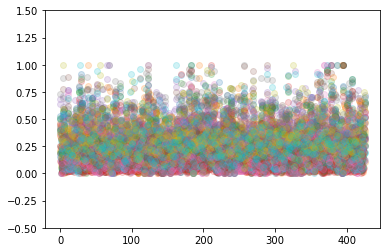

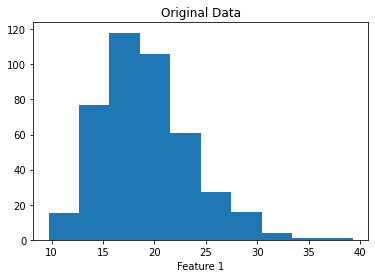

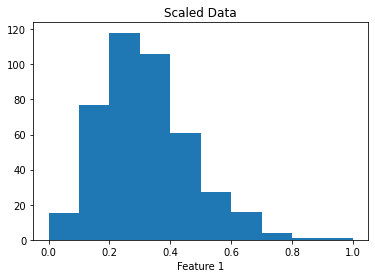

In [2]:
# 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape) # 특성의 수 : 30
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)


# MinMaxScaler의 공식 : (X - X_min) / (X_max - X_min)
# 훈련집합의 최대 최소값에 따라 달라짐

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # scaler 학습
X_train_scaled = scaler.transform(X_train)

plt.plot(X_train_scaled, 'o',alpha =0.2) # 0 ~ 1 사이로 데이터가 전처리됨
plt.ylim(-0.5,1.5)
plt.show()
# => 훈련집합의 모든 데이터가 0~1 사이의 값으로 치환됨

plt.hist(X_train[:,1])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.show()
plt.hist(X_train_scaled[:,1])
plt.title("Scaled Data")
plt.xlabel("Feature 1")
plt.show()

# => 데이터의 분포위치는 똑같고 단순히 값만 줄이는 0~1 의 값으로 치환하는 개념임

In [9]:
# 테스트셋 적용
X_test_scaled = scaler.transform(X_test)
plt.plot(X_test_scaled, 'o', alpha=0.2)
# -> 몇몇 데이터는 이상값을 가지는것을 확인, 훈련집합의 모델을 그대로 사용했기 때문
# -> 스케일 모델을 사용할때 훈련세트와 테스트세트에 같은 변환(transform)을 적용하는 것이 중요!

ValueError: X has 2 features, but MinMaxScaler is expecting 30 features as input.

(50, 2)


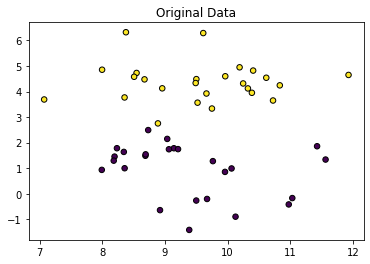

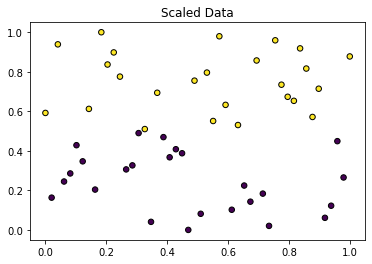

In [119]:
# Quantile 변환기
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples= 50, centers= 2, random_state=4, cluster_std=1)
print(X.shape) #특성의 수 : 2

plt.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='black')
plt.title("Original Data")
plt.show()

# Quantitle는 0~1사이에 n_quantitles개 만큼의 분위를 만들어 데이터를 고르게 분포시킴
# 하위 25%의 데이터는 0.25 값으로 바뀜
plt.scatter(X_trans[:,0],X_trans[:,1],c=y,s=30,edgecolors='black')
plt.title("Scaled Data")
plt.show()


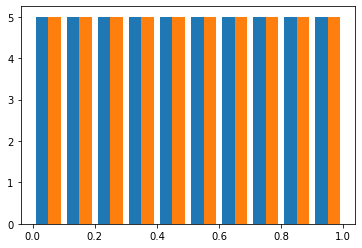

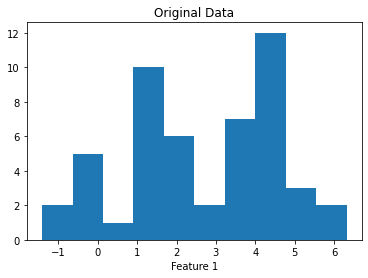

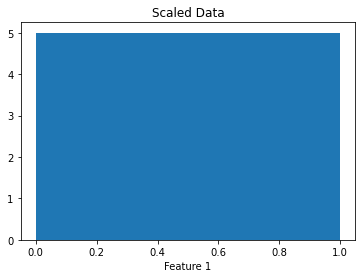

In [118]:
plt.hist(X_trans)
plt.show()
plt.hist(X[:,1])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.show()
plt.hist(X_trans[:,1])
plt.title("Scaled Data")
plt.xlabel("Feature 1")
plt.show()

# 기존의 스케일링 기법과는 다르게 데이터가 균등하게 분포한 것을 확인 할 수 있음.
# 0 과 1사이의 값으로 데이터를 균등하게 분포시킴 =>  하위 25%의 데이터는 0.25로 바뀜 (0~1 사이로 바뀐뒤 값이 정렬된다고 생각하면 이해가 편함)

C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (100) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


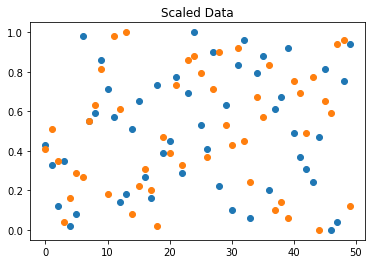

분위와 특성의 수 (50, 2)
분위
 [[ 7.07391193 -1.41342865]
 [ 7.99313649 -0.89623088]
 [ 7.99815287 -0.63993225]
 [ 8.18378052 -0.41632061]
 [ 8.19679821 -0.26430318]
 [ 8.23501274 -0.20283165]
 [ 8.34468785 -0.16816717]
 [ 8.35656532  0.85665806]
 [ 8.35760513  0.93528488]
 [ 8.37839711  0.99078055]
 [ 8.5093186   0.99907772]
 [ 8.54824906  1.27689813]
 [ 8.67494727  1.29564214]
 [ 8.68937095  1.3389402 ]
 [ 8.69289001  1.45456477]
 [ 8.7337095   1.48709629]
 [ 8.8888119   1.54322016]
 [ 8.92229526  1.63824349]
 [ 8.95786868  1.74115688]
 [ 9.03763281  1.7467316 ]
 [ 9.06439343  1.78117369]
 [ 9.1438515   1.78248134]
 [ 9.20989214  1.85948594]
 [ 9.38860303  2.14664757]
 [ 9.49123469  2.49162431]
 [ 9.50048972  2.75339082]
 [ 9.50229021  3.33454307]
 [ 9.5211582   3.56405517]
 [ 9.61215674  3.64867534]
 [ 9.66300069  3.68863618]
 [ 9.67284681  3.7681238 ]
 [ 9.75082841  3.92187496]
 [ 9.76566918  3.950218  ]
 [ 9.95926647  4.12110935]
 [ 9.96346605  4.12485526]
 [10.06393839  4.24176117]
 [10.1

In [123]:
scaler2 = QuantileTransformer(n_quantiles=100) # 분위 수

X_trans2 = scaler2.fit_transform(X)

plt.plot(X_trans2,'o')
plt.title("Scaled Data")
plt.show()

print("분위와 특성의 수",scaler2.quantiles_.shape)
print("분위\n", scaler2.quantiles_) # 특성 별로 100개의 분위 확인가능
print(np.percentile(X_trans2[:,0], [0, 25, 50 ,75, 100]))

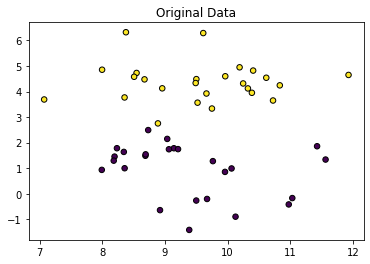

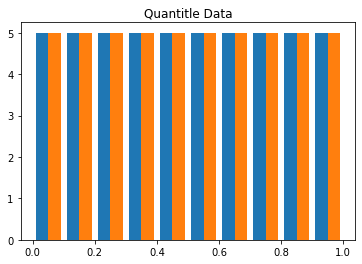

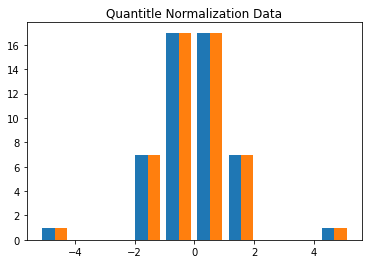

In [127]:
# normal 옵션을 통해 균등분포가 아닌 정규분포로 바꿀 수 있다.
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X[:,0],X[:,1],c=y,s=30, edgecolors='black')
plt.title("Original Data")
plt.show()

plt.hist(X_trans2)
plt.title("Quantitle Data")
plt.show()

plt.hist(X_trans)
plt.title("Quantitle Normalization Data")
plt.show()

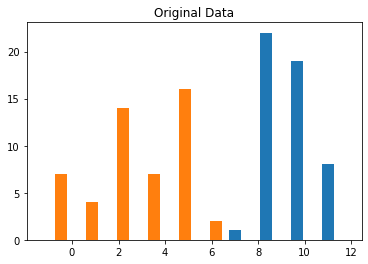

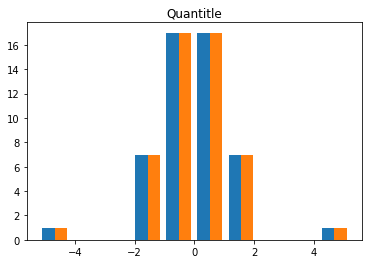

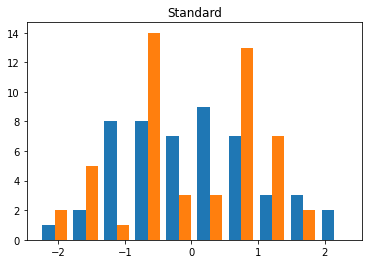

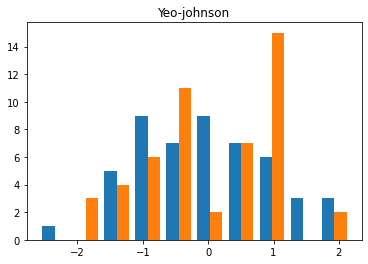

In [135]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_Quantitle = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_Quantitle)
plt.title("Quantitle")
plt.show()

X_Standard = StandardScaler().fit_transform(X)
plt.hist(X_Standard)
plt.title("Standard")
plt.show()

# scikit-learn 2.0 버전 부터 데이터의 특성을 정규분포에 가깝게 만들어주는 PowerTransformer()가 추가되었음.
# 매개변수로 "yeo-johnson"(기본값) 과 "box-cox" 가 있음

X_Power_yeo = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_Power_yeo)
plt.title("Yeo-johnson")
plt.show()

# X_Power_box = PowerTransformer(method='box-cox').fit_transform(X)
# plt.hist(X_Power_box)
# plt.title("Box-cox")
# plt.show()




Text(0.5, 1.0, 'Badly Scaled Data')

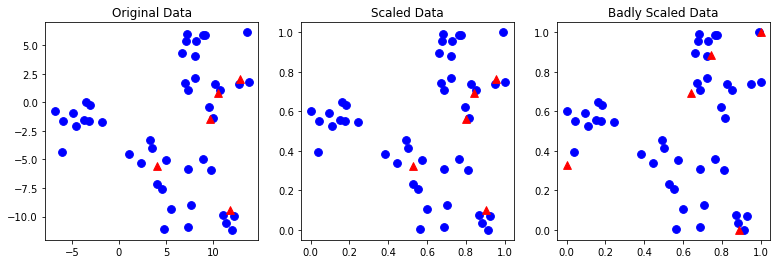

In [12]:
# 훈련집합과 테스틑집합의 스케일은 같은 방식으로 조정해야한다.

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5,random_state=4,cluster_std=2)

X_train, X_test = train_test_split(X,random_state=5,test_size=0.1)

fig, axes = plt.subplots(1,3,figsize=(13,4))

axes[0].scatter(X_train[:,0],X_train[:,1],c='blue',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],c='red',s=60, marker='^')
axes[0].set_title("Original Data")

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c='blue',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c='red',s=60, marker='^')
axes[1].set_title("Scaled Data")

scaler2 = MinMaxScaler().fit(X_test)
X_test_scaled = scaler2.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c='blue',s=60)
axes[2].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c='red',s=60, marker='^')
axes[2].set_title("Badly Scaled Data")

# => 훈련집합과 테스트집합의 스케일러는 같은것을 사용해야한다.

In [22]:
# 실험적으로 확인
# 유방암 데이터셋의 정확도 비교

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

from sklearn.svm import SVC

svm = SVC(gamma='auto').fit(X_train, y_train)
print("Original Accuracy: ",svm.score(X_test, y_test)) # 0.61

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_scaled, y_train)
print("MinMax Scaled Accuracy: ",svm.score(X_test_scaled, y_test)) # 0.94

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_scaled, y_train)
print("Standard Scaled Accuracy: ",svm.score(X_test_scaled, y_test)) # 0.96

Original Accuracy:  0.6153846153846154
MinMax Scaled Accuracy:  0.9440559440559441
Standard Scaled Accuracy:  0.965034965034965
